# Building Repuation on Stackoverflow

StackOverflow (SO) is one of the most widely used online community to help developers from multiple genres to learn and share programming knowledge. The community’s trust in the user is reflected through a reputation score which depends on numerous factors. Since its inception, building a strong reputation has been considered to be a strenuous task, and there has been a lot of debate on how harsh the SO community is towards novice developers. 

In this project we present some of the features we found that can help a newbie user build their reputation.

We have divided our project in to three modules. We first segregate all the users based on their monthly change in reputation score (for March 2018) and analyze the factors responsible for the growth or decline in each group. Then we analyze how the users are correlated with the *Topic Tags* and which tag should a user target to get maximal benefits in terms of their reputation change. Finally, we build a classifier using the BOW approach along with the features we thought would help the classifier predict if a particular question is more or less likely to get an upvote above the average score in a tag.   

* **Analysis of User Growth using Reputation Score**

* **Analysis of Popular Tags that are easiet to build a users Repuation Score**

* **Building a Classifier to predict upvotes on a question.**

But first, lets start with how we collected and processed the data.

### Data Pipeline
We used a Python Wrapper SO API along with two scrappers that we built to extract data.

[![](https://raw.githubusercontent.com/stripathi08/CMU_15688/420743443b539e5260f7b3b6a7a15a46e99b8e78/images/pipeline.png)](Link)


#### StackAPI
Stack API provided us with a very small set of data to work with - due to which we had to build our own scrappers.
- Post IDs for each user.
- Full Reputation History of each user. Realizing that the amount of data is huge to work with, we trimmed it in the time period starting from 1st Jan 2018 to 5th May 2018.


#### User  Scrapper
We started with extracting details of the users based on their [*Monthly Reputation Change*](https://goo.gl/Tc2DpG). Since the users are ranked by highest reputation change to lowest reputation change. We divided the users into three categories and selected them based on their position in Reputation change leaderboard.

| Reputation Change | Page Range |
|:-----------------:|:----------:|
|       High        |    1-25    |
|      Medium       |  3000-3020 |
|        Low        |  7745-7767 |

#### Question Answer Scrapper
- Fetching the individual posts of each user for the month of March 2018.
- Extracting the raw text of the Questions asked in the Month of March 2018 for a particular set of Topic Tags. We restricted ourselves to 10 common tags.

**Note**: To improve on the readability of the Notebook, we have added the code for our scrappers in the Appendix at the end of this notebook. For our scrappers, you can read the first three code blocks in the Appendix.

###  Module 1: Analysis of User Growth using Reputation Score
In this module we look at some of the common statistics for the user data. The data was first cleaned using standard data cleaning techniques such as remove rows that have NAN values.

The user data that was used for plotting the mean statistics:
* **Accept Rate** : The ratio of questions asked and marking an answer as accepted answer.	
* **Age** : Age of the user	
* **Badges** :
    * **Gold** : Gold badges recognize important contributions from members of the community. They are rarely awarded.
    * **Silver** : Silver badges are less common than bronze ones. You'll need to plan your strategy to get one of these.
    * **Bronze** : Bronze badges encourage users to try out new features on the site. They are easy to get.	
* **Account Age** : Calculated by substracting the Account Creation Date from present day (10th May 2018) 		

#### Summary of the User Features Described Above.

- Plots for Mean Acceptance Rate and Mean Account Age
From the graphs listed below we can see that:
    * The **Average Acceptance Rate** is quite high for the users with the lowest Reputation change category. As a result we wanted to see if the users in this category are older and more experienced than the users in the other two categories.
    * We then looked at the **Average Account Age** Statistics that we had calculated. The plot shown below confirmed that the users in lowest reputation category are indeed older.

In [4]:
# Please run "Code Block 1.3" from the Appendix before running the cell
x = list(df_accept_rate['Class_name'])
accept_rate_y = list(df_accept_rate['accept_rate'])

df_bronze_y = list(df_bronze['bronze'])
df_silver_y = list(df_silver['silver'])
df_gold_y = list(df_gold['gold'])
df_reputaion_y = list(df_reputaion['reputation'])
df_account_age_y = list(df_account_age['account_age'])

p0 = figure(title='Mean Acceptance Rate', x_range=x, plot_width=450, plot_height=300, y_axis_label = "Acceptance Rate")
p0.vbar(x=x, top=accept_rate_y, width=0.5)
p1 = figure(title='Mean Account Age', x_range=x, plot_width=450, plot_height=300, y_axis_label = "Account Age")
p1.vbar(x=x, top=df_account_age_y, width=0.5)
show(row(p0, p1))

- Plots for **Average Number of Badges i.e Gold , Silver , Bronze**

    * It is clear from the graphs plotted below that the users in the lowest reputation change category are older and more experienced. 
    * It was clear to us from these graphs that the lowest category users had already built up a good reputation and weren't eager to increase their reputation.
    * This insight also relates to the plots of the highest reputation change for the users. These users are not only younger but less experienced.
    * The users that lie between these two categories are the users which are inexperienced and have not really worked to improve their reputation scores much as compared to cateogry with the highest reputation change.

In [9]:
p0 = figure(title='Mean Count Gold Badges', x_range=x, plot_width=450, plot_height=300, y_axis_label = "Gold Badge Count")
p0.vbar(x=x, top=df_gold_y, width=0.5)
p1 = figure(title='Mean Count Silver Badges', x_range=x, plot_width=450, plot_height=300, y_axis_label = "Silver Badge Count")
p1.vbar(x=x, top=df_silver_y, width=0.5)
p2 = figure(title='Mean Count Bronze Badges', x_range=x, plot_width=450, plot_height=300, y_axis_label = "Bronze Badge Count")
p2.vbar(x=x, top=df_bronze_y, width=0.5)
show(row(p0, p1,p2))

We finally observed the average reputation for the users in each category. The users in the lowest reputation change category are the users which have the highest repuation on the site. 
    

In [6]:
p0 = figure(title='Mean Reputation', x_range=x, plot_width=450, plot_height=300, y_axis_label = "Reputation")
p0.vbar(x=x, top=df_reputaion_y, width=0.5)
show(p0)

## Analysis of the User's Reputation

We plot the reputation change for one of the user in the highest reputation change category. The time range for the plot is Jan 1st to May 5th.

The different type of posts that can cause reputation change are listed below. 
1. Increase in Reputation : 
    * **Answer Accepted** : Whenever the answer given by user for a question is accepted by the owner of the question.
    * **Post Upvoted** : If any post (Question / Answer) is accepted or upvoted by another user.
    * **Bounty Earned** : If the user earns a bounty for answering the question of another user.
2. Decrease in Reputation : 
    * **Bounty Given** : If a bounty is given to other users to a Question answered in a timely manner.
    * **Post downvoted** : If any post (Question / Answer) is accepted by another user.
    * **Answer Unaccepted** : If one of the answer that was marked as accepted was later removed as an accepted answer.
    * **Post unupvoted** : If any post (Question / Answer) that was upvoted before but the upvote was taken back.
    * **User Deleted (Question)** : The questions that are old or abandoned are deleted automatically according to different [circumstances](https://goo.gl/5AN85Q).

We observed that the highest change in reputation comes from either giving or earning a **Bounty**.

In [11]:
## Please run "Code Block #9" in the Appendix before running the cell.

user_df = cat1.loc[cat1['user_id'] == 1020526]
source = ColumnDataSource(user_df)

p1 = figure(title='Reputation Change for the User - 1020526', plot_width=975, plot_height=400,x_axis_type="datetime", x_axis_label = "Date", y_axis_label = "Reputation Gain / Loss")
p1.line(x='creation_date', y='reputation_change', source=source, line_width=1.2, color='green', legend='Reputation Change')

hover = HoverTool(tooltips=[
    ("Type", "@reputation_history_type"),("Change", "@reputation_change")
])

p1.add_tools(hover)

p1.background_fill_color = "beige"
p1.background_fill_alpha = 0.3

p1.legend.location = "top_left"
show(p1)

The followin graph shows the ratio of *log* of the reputation count for different reputation categories over a period of ~2 months, ie. March 10th 2018 to April 30th 2018.
The majority of the activity on StackOverflow was *post upvoted* and *answer accepted*.

In [12]:
combined_df = pd.concat([cat1, cat2, cat3])
reputation_type_dfs = []

uniqe_reputation_type = combined_df['reputation_history_type'].unique()
for unique_reputation in uniqe_reputation_type:
    rep_df = combined_df.loc[combined_df['reputation_history_type'] == unique_reputation]
    rep_df_grp = rep_df.groupby('creation_date').size().reset_index(name=unique_reputation)
    rep_df_grp.set_index('creation_date')
    reputation_type_dfs.append(rep_df_grp)

x = reduce(lambda x, y: pd.merge(x, y, on = ['creation_date'], how='outer'), reputation_type_dfs).fillna(1)
x['creation_date'] = pd.to_datetime(x['creation_date'])

mask = (x['creation_date'] > '2018-4-10') & (x['creation_date'] <= '2018-5-1')
y = x[mask]

y = y.set_index('creation_date')
y_log = y.apply(np.log)
y_log = y_log.reset_index()

source = ColumnDataSource(y_log)

stacks = list(y_log)[1:]
p0 = figure(title='Log of Reputation Type Count Over Date', plot_width=975, plot_height=500, x_axis_type="datetime", x_axis_label = "Date", y_axis_label = "log(Reputation Type Count)")

p0.vbar_stack(stacks, x='creation_date', color=Category20[20][0:18], source=source, width=50000000, legend=[value(x) for x in stacks])

new_legend = p0.legend[0]
new_legend.location=(0,0)
p0.legend[0].plot = None
p0.add_layout(new_legend, 'right')

p0.background_fill_color = "beige"
p0.background_fill_alpha = 0.3

show(p0)

W-1005 (SNAPPED_TOOLBAR_ANNOTATIONS): Snapped toolbars and annotations on the same side MAY overlap visually: Figure(id='435a57ba-decb-4a82-8afc-6d093f75d7d3', ...)


We also observed that the Average Reputation Growth for each category to understand the variance in reputation growth for users in all the three categories.
- The average reputation growth is similar for the highest reputation change and middle reputation change category.
- The average reputation growth for the lowest reputation change users, similar to other categories.
- The decrease in the reputation for a brief period was because the users in the lowest reputation change category gave away their reputations as bounty.

In [13]:
cat1_avg = cat1.groupby('creation_date', as_index=False)['reputation_change'].mean()
cat2_avg = cat2.groupby('creation_date', as_index=False)['reputation_change'].mean()
cat3_avg = cat3.groupby('creation_date', as_index=False)['reputation_change'].mean()

p2 = figure(x_axis_type="datetime", title="Average Reputation Growth", plot_width=975, plot_height=500, x_axis_label = "Date", y_axis_label = "Reputation")
p2.background_fill_color = "beige"
p2.background_fill_alpha = 0.3

p2.line(x=cat1_avg['creation_date'], y=cat1_avg['reputation_change'], line_width=1.2, color='green', legend='Highest Reputation Change')
p2.line(x=cat2_avg['creation_date'], y=cat2_avg['reputation_change'], line_width=1.2, color='orange', legend='Middle Reputation Change')
p2.line(x=cat3_avg['creation_date'], y=cat3_avg['reputation_change'], line_width=1.2, color='#4d94ff', legend='Lowest Reputation Change')

p2.legend.location = "bottom_left"
show(p2)

## Topic Modeling
Topic modeling is an unsupervised machine learning method for discovering topics that occur in a collection of document.[5] 
The two techniques used for topic modeling are :
* [Latent Dirichlet Allocation](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization)
* [Non-negative Matrix Factorization](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization)

In this section we found relevant keywords for a topic discovered in questions and answers by users in each category.

The following graphs shows the top 5 words that contribute the most in questions of users in each category using LDA algorithm for topic modeling.

In [16]:
## Please run "Code Block # 6" and "Code Block # 7A" in the Appendix before running the cell.

p0 = figure(title='Highest Rep Change - Questions LDA', x_range=words1, plot_width=300, plot_height=300, x_axis_label = "Words", y_axis_label = "Normalized Distribution Over Words")
p0.vbar(x=words1, top=prob1, width=0.5)

p1 = figure(title='Middle Rep Change - Questions LDA', x_range=words2, plot_width=300, plot_height=300, x_axis_label = "Words", y_axis_label = "Normalized Distribution Over Words")
p1.vbar(x=words2, top=prob2, width=0.5)

p2 = figure(title='Lowest Rep Change - Questions LDA', x_range=words3, plot_width=300, plot_height=300, x_axis_label = "Words", y_axis_label = "Normalized Distribution Over Words")
p2.vbar(x=words3, top=prob3, width=0.5)

show(row(p0, p1, p2))

The following graphs shows the top 5 words that contribute the most in questions of users in each category using NMF algorithm for topic modeling.

In [18]:
## Please run "Code Block #6" and "Code Block #7B" in the Appendix before running the cell.

p0 = figure(title='Highest Rep Change - Questions NMF', x_range=words1, plot_width=300, plot_height=300, x_axis_label = "Words", y_axis_label = "Normalized Distribution Over Words")
p0.vbar(x=words1, top=prob1, width=0.5)

p1 = figure(title='Middle Rep Change - Questions NMF', x_range=words2, plot_width=300, plot_height=300, x_axis_label = "Words", y_axis_label = "Normalized Distribution Over Words")
p1.vbar(x=words2, top=prob2, width=0.5)

p2 = figure(title='Lowest Rep Change - Questions NMF', x_range=words3, plot_width=300, plot_height=300, x_axis_label = "Words", y_axis_label = "Normalized Distribution Over Words")
p2.vbar(x=words3, top=prob3, width=0.5)

show(row(p0, p1, p2))

The following graphs shows the top 5 words that contribute the most in answers of users in each category using LDA algorithm for topic modeling.

In [20]:
## Please run "Code Block #6" and "Code Block #8A" in the Appendix before running the cell.

p0 = figure(title='Highest Rep Change - Answers LDA', x_range=words1, plot_width=300, plot_height=300, x_axis_label = "Words", y_axis_label = "Normalized Distribution Over Words")
p0.vbar(x=words1, top=prob1, width=0.5)

p1 = figure(title='Middle Rep Change - Answers LDA', x_range=words2, plot_width=300, plot_height=300, x_axis_label = "Words", y_axis_label = "Normalized Distribution Over Words")
p1.vbar(x=words2, top=prob2, width=0.5)

p2 = figure(title='Lowest Rep Change - Answers LDA', x_range=words3, plot_width=300, plot_height=300, x_axis_label = "Words", y_axis_label = "Normalized Distribution Over Words")
p2.vbar(x=words3, top=prob3, width=0.5)

show(row(p0, p1, p2))

The following graphs shows the top 5 words that contribute the most in answers of users in each category using NMF algorithm for topic modeling.

In [22]:
## Please run "Code Block #6" and "Code Block #8B" in the Appendix before running the cell.


p0 = figure(title='Highest Rep Change - Answers NMF', x_range=words1, plot_width=300, plot_height=300, x_axis_label = "Words", y_axis_label = "Normalized Distribution Over Words")
p0.vbar(x=words1, top=prob1, width=0.5)

p1 = figure(title='Middle Rep Change - Answers NMF', x_range=words2, plot_width=300, plot_height=300, x_axis_label = "Words", y_axis_label = "Normalized Distribution Over Words")
p1.vbar(x=words2, top=prob2, width=0.5)

p2 = figure(title='Lowest Rep Change - Answers NMF', x_range=words3, plot_width=300, plot_height=300, x_axis_label = "Words", y_axis_label = "Normalized Distribution Over Words")
p2.vbar(x=words3, top=prob3, width=0.5)

show(row(p0, p1, p2))

#### Word Clouds for Question and Answers  

The word cloud drawn below visualizes the most common words used in Questions. 

(-0.5, 299.5, 199.5, -0.5)

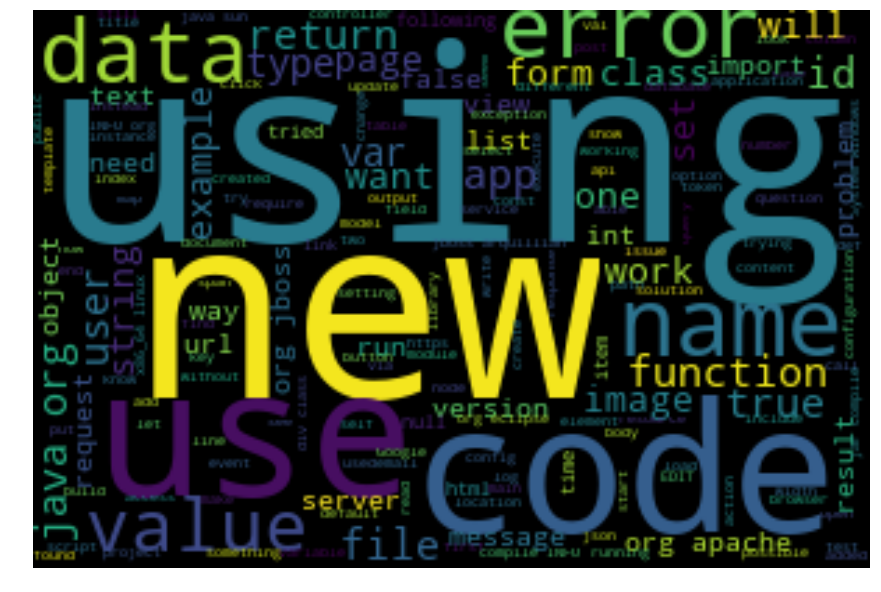

In [29]:
flat_ques_list = [item for sublist in ques_list for item in sublist]
ques_str = ' '.join(flat_ques_list)

fig = plt.figure(figsize=(15, 15))
wordcloud_ques = WordCloud(width=300, height=200, margin=0, stopwords=STOPWORDS).generate(ques_str)
plt.imshow(wordcloud_ques, interpolation='bilinear')
plt.axis("off")

The word cloud drawn below visualizes the most common words used in Answers. 

(-0.5, 299.5, 199.5, -0.5)

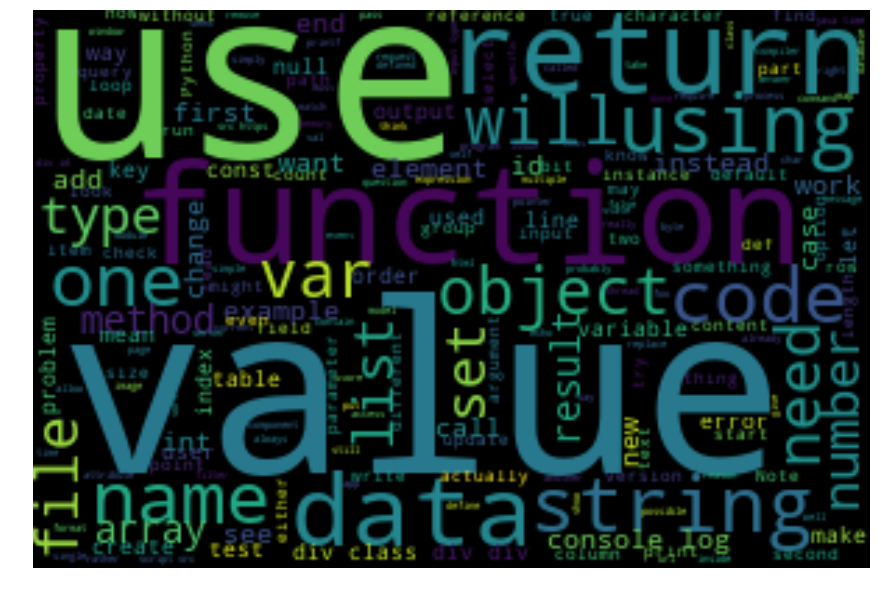

In [30]:
flat_ans_list = [item for sublist in ans_list for item in sublist]
ans_str = ' '.join(flat_ans_list)

fig = plt.figure(figsize=(15, 15))
wordcloud_ques = WordCloud(width=300, height=200, margin=0, stopwords=STOPWORDS).generate(ans_str)
plt.imshow(wordcloud_ques, interpolation='bilinear')
plt.axis("off")

### Module 2: Analyzing Popular tags

To understand how a user needs to interact with a post on Stackoverflow, we need to analyze the patterns from the textual information and understand the correlation between the Questions asked or the Questions answered and the reputation score of a user. 
To do that, we extract the raw text of the Questions asked in the Month of March 2018 for a particular set of **Topic Tags**. A *Topic Tag* is a word or a phrase that describes the topic of a question. Tags are meant to connect experts with questions that they will be able to answer by *sorting* questions into specific, well-defined categories. As a general rule of thumb, a user is always advised to refrain him/herself from creating new tags.

To have an upper limit on the number of questions we fetch for analyzing for this project, we restrict ourselves to a total of **10** tags. All the tags are related to either a Programming Language or a Framework.

In [31]:
tag_list = ["python", "R", "java", "javascript", "c#", "ios", "c++", "android", "sql", "php"]

We start with analyzing the effect of a bunch of different parameters that can potentially help a user in building his reputation quickly over time. As we have categorized the Questions and Answers over multiple tags, we report how each of these factors/parameters differ for the tags.

- **Score of a Question**

A score is the total sum of upvotes (+ve) and downvotes (-ve) on a question. These score values reflect on how likely it is for a question to get a upvote or a downvote in a particular tag. Looking at the histogram below, it can be inferred that the chances of getting an upvote for a question is higher in languages that are relatively new. It also explains that the Question-Base(Total Questions) for languages like Python/Java/SQL are larger and a user should probably search for his/her question first before posting in such tags.

In [34]:
# Please run "Code Block # 4" before running the cell
def avg_score(tag_list):
    histogram = np.zeros(shape=len(tag_list))
    for idx, tags in enumerate(tag_list):
        dataset = pickle.load(open("module2/data/{}".format(tags), "rb"))
        avg_s= 0
        for post in dataset: avg_s += int(post["score"])
        histogram[idx] = avg_s
    return histogram

p = plot(avg_score(tag_list), tag_list, typ = "bar", title = "Normalized Scores Questions asked in each Tag")
show(p,notebook_url="*")

- **Average time to Answer a Question**

This is the average time taken to respond to a question asked in a particular tag. Higher value corresponds to a better response rate and hopefully would result in the quick change in the user's reputation.     

In [35]:
def fetch_answer_relative_time(link):
    response = requests.get(url = link)
    root = BeautifulSoup(response.content, "html.parser")
    try:
        ans_item = root.find("div", id = "answers").find("span", class_ = "relativetime")
        dt = datetime.datetime.strptime(ans_item.attrs["title"][:-1], "%Y-%m-%d %H:%M:%S")
        return dt
    except:
        return None

def avg_time_to_answer(tag_list):
    for tag in tag_list:
        dataset = pickle.load(open("module2/data/{}".format(tag), "rb"))
        writer = open("module2/avg_time/{}".format(tag), "a")
        time_to_answer = []
        for post_id in range(1000):
            ans_datetime = fetch_answer_relative_time(dataset[post_id]["link"])
            if ans_datetime != None:
                time_to_answer.append(
                    (ans_datetime - datetime.datetime.fromtimestamp(dataset[post_id]["creation_date"])) / datetime.timedelta(minutes=1))
            if (post_id + 1) % 100 == 0 and len(time_to_answer) != 0:
                writer.write(tag + " " + str(sum(time_to_answer)/len(time_to_answer)) + "\n")

def calculate_avg_time(tag_list):
    out_lst = []
    for tag in tag_list:
        with open("module2/avg_time/{}".format(tag), "r") as flp: data = flp.readlines()
        out_lst.append(np.mean([float(line.split("\n")[0].split(" ")[1]) if float(line.split("\n")[0].split(" ")[1]) >= 0 else 0 for line in data])/60)
    return out_lst

p = plot(calculate_avg_time(tag_list), tag_list, typ = "bar", title = "Average Response time (in Hours) in each Tag")
show(p,notebook_url="*")

- **Probability of getting an Answer**

This represents the % of questions that gets and answer which gets accepted by the user. This factor explains how likely is it for a user to get a satisfactory answer. This also showcases which tag has a higher percentage of experts in their (sub)-community. We plot both the probability of a question to get answered and to get accepted. As evident from the stacked bar chart below, *R* and *C++* are tags which has the higest Accepted by Answered Ratio. 

In [36]:
def prob_get_answer(tag_list):
    out_lst_accept, out_lst = [], []
    for idx, tags in enumerate(tag_list):
        dataset = pickle.load(open("module2/data/{}".format(tags), "rb"))
        got_answer = got_accepted_answer = 0
        for post in dataset:
            if post["is_answered"] == True:
                got_accepted_answer += 1
                got_answer += 1
            elif post["answer_count"] > 0 : got_answer += 1
        out_lst_accept.append(got_accepted_answer / len(dataset))
        out_lst.append(got_answer / len(dataset))
    return out_lst_accept, out_lst

accept, answer = prob_get_answer(tag_list)
cols = ["accepted", "answered"]
data = {
    "Tags": tag_list,
    "accepted": accept,
    "answered": list(map(lambda z : z[0] - z[1], zip(answer, accept)))
}

p = plot(data, cols, tag_list, typ = "two_bar", title = "Probability of getting an Answer (Accepted versus All Answered)")
p.y_range.start = 0
p.x_range.range_padding = 0.1
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
show(p,notebook_url="*")

- **Active Tags**

We define *activity* as an event marked by the latest question edit or answer edit or new answer or a new comment added for a particular post. More formally, we define an **Activity Index** as
$$
\mu_{tag} = \frac{T_{LAST} - T_{CRT}}{T_{CUR} - T_{CRT}}
$$
where $\mu_{tag}$ is the activity index for a "tag", $T_{LAST}$ is the timestamp for the *last* activity, $T_{CRT}$ is the timestamp for the day on which the post was *created* and $T_{CUR}$ is the *current* timestamp.

It can inferred from the plot below that  are the most active tags and it would be beneficial for a user to target such tags to get responses and have a better chance of increasing his/her reputation. 

In [37]:
def active_tags(tag_list):
    from datetime import datetime as dt
    out_lst = []
    for idx, tags in enumerate(tag_list):
        dataset = pickle.load(open("module2/data/{}".format(tags), "rb"))
        activity_idx = 0.0
        for post in dataset:
            activity_idx += (dt.fromtimestamp(post["last_activity_date"]) - dt.fromtimestamp(post["creation_date"])) / (dt.today() - dt.fromtimestamp(post["creation_date"]))
        out_lst.append(activity_idx / len(dataset))
    return out_lst

p = plot(active_tags(tag_list), tag_list, typ = "bar", title = "Activity Index for each Tag")
show(p,notebook_url="*")

### Module 3: Predicting  Upvotes/Downvotes for a Question

Motivated by our analysis on how each metric differs for each tag, we now try and understand which features results in an upvote or a downvote of a question. For this, we train a SVM classifier and try to classify which question would get an upvote (defined by the number of votes above a threshold (mean) value) by using a Bag-of-words TFIDF vector. Then, we analyze how corelated are the features with the score of a post and conclude with whether a BOW approach can be used in our scenario to get acceptable classification results.

**Preprocessing**: We extracted the raw text of the Questions and their Answers, posted in March 2018 for the above mentioned 10 tags. We clipped the number of questions to a maximum of 1000 for each tag. This was done partly due to the fact that Stackoverflow was quite adamant abour giving up its data and kept blocking our IP after a few thousand requests. We ended up starting instances in different regions to tackle this situation via Google's Cloud Platform.


In [38]:
# Custom class to add TFIDF Sparse Matrices with Categorical Features that we store in a Dict Vectorizer
class FeatureVectorizer:
    def __init__(self, max_val):
        self._tfidf = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words("english"), ngram_range=(1, max_val))
        self._dict = DictVectorizer()

    def fit_transform(self, X, dic):
        return sph([self._tfidf.fit_transform(X["text"]), self._dict.fit_transform(dic)])

    def transform(self, X, dic):
        return sph([self._tfidf.transform(X["text"]), self._dict.transform(dic)])


def train(X, y, kernel):
    clf = LinearSVC(random_state=0)
    return clf.fit(X, y)

def evaluate(X_te, clf):
    return clf.predict(X_te)


def calculate_avg_scores(tag_list, mode = "train"):
    score = {}
    for tag in tag_list:
        with open("module2/train_questions/{}".format(tag), "r") as flp: data = flp.readlines()
        scores = 0.0
        for line in data:
            scores += float(json.loads(line)["s"])
        score[tag] = scores / 1000

        if mode == "train":
            with open("module2/train_questions/{}".format(tag), "r") as flp: data = flp.readlines()
            higher = lower = 0
            for line in data:
                if float(json.loads(line)["s"]) > score[tag]: higher += 1
                else: lower += 1
    return score

In [40]:
# For "create_feats"/"create_feats_clipped", please look at the ""Code Block #5"" in the Appendix.

for kernel in ["linear"]:
    print("Creating Features...")
    vectorizer, X, y = create_feats_clipped(tag_list, mode="train", vectorizer=None)
    _, X_te, y_te = create_feats_clipped(tag_list, mode="test", vectorizer=vectorizer)
    print("Dimension of X = {} and y = {}".format(X.shape, y.shape))
    print("Training...")
    clf = train(X, y, kernel=kernel)
    print("Evaluating...")
    y_pred = evaluate(X_te, clf)
    print("Confusion Matrix = {}".format(confusion_matrix(y_te, y_pred)))
    print("Error rate for SVM with kernel {} is \t {}".format(kernel, np.sum(y_pred != y_te) / len(y_te)))

Creating Features...
Dimension of X = (9982, 2216) and y = (9982,)
Training...
Evaluating...
Confusion Matrix = [[483  67]
 [363  87]]
Error rate for SVM with kernel linear is 	 0.43


In [41]:
feat_names = vectorizer._tfidf.get_feature_names()
coeffs = clf.coef_
combination = sorted(zip(feat_names + list(range(11)), coeffs[0, :]), key = lambda x : x[1], reverse = True)
best_feat, worst_feat = combination[:10], combination[-10:][::-1]

In [42]:
best_feat

[('members', 2.266814713458844),
 ('strange', 1.8368220056502451),
 ('matrices', 1.7914559589940464),
 ('wall', 1.7894643308743763),
 ('pool', 1.7461104679705313),
 ('attached', 1.683634843454701),
 ('million', 1.652304839632075),
 ('tasks', 1.6087353288074127),
 ('shiny', 1.5425245062509292),
 ('cause', 1.535642941591187)]

Our linear kernel SVM assigns the highest weight to the words that does not make a lot of sense.

In [43]:
worst_feat

[('chr', -1.6325596067746375),
 ('saved', -1.564295761241135),
 ('constant', -1.4324313598771432),
 ('1000', -1.3559126039950646),
 ('checkout', -1.3441876177060648),
 ('instantiation', -1.3430145128675854),
 ('bitmap', -1.3388019527816228),
 ('skip', -1.2950506068504135),
 ('identifier', -1.2447653336394375),
 ('rvalue', -1.2177602081205967)]

Also, looking at our list of our worst features (as per SVM), it is fair to say that a Bag-of-words approach is not suitable for such a task.

## Conclusions 
1. The users in the highest reputation category are generally have lower reputation score than the users in the lower reputation change category.
2. If the tag associated belongs to a language that is more established in the industry, it is more likely that the user will recieve a downvote for his or her question or answer.
3. TF-IDF is not enough to build a classifier that predicts an upvote for a question in a tag.

## Further Investigations

There is a ton of things that we would like to explore further. Lets start off with data collection.

1. Stackoverflow has made it quite easy to extract data using their APIs. However, the granularity about which we are talking - question/answer text, comment text, upvotes on a comment are few among the many other services that are currently not supported by the API. Hence, we had to resort to using our own scrapers which was frequently blocked by SO. It would have been much more challenging to work on larger data sets and explore more.

2. Exploring syntatic and semantic differences in the question text. The questions and answers on SO are *tricky* and applying any usual NLP technique to understand the text semantics would not help. By *tricky*, we mean that the sentences   are quite unstructured, their grammar is broken and they generally do not convey any syntactic meaning. However, semantically - almost all the questions make sense.

3. NEURAL NETS! Given the time (and other courses, of course) constraints, we were unable to play with NNets. As mentioned above, its quite difficult to engineer features for cases like this and we would have loved to give this task to a NNet.  

4. Working Large Scale and analyzing Reputation change of an expert versus a newbie. Stackoverflow provides us with the reputation change of each and every event of a user. For the first part of our project, we worked on analyzing the reputation change of 1900 users. This data alone was ~2GiB and required a lot of processing. Working with more users would potentially gives us a better insight of what **really** drives a user's reputation.


## References

1. [Stack API](http://stackapi.readthedocs.io/en/latest)
2. [SKLearn](http://scikit-learn.org/)
3. [Bokeh](https://bokeh.pydata.org/en/latest/)
3. [StackExchange API](https://api.stackexchange.com/)
4. [And of course, Stackoverflow!](https://stackoverflow.com/)
5. [Topic Modeling Reference](https://stackoverflow.blog/2017/07/06/text-mining-stack-overflow-questions/)

## Appendix

In [2]:
                            #---------- CODE BLOCK 0 ----------#
# All of our imports!

import time
import datetime, requests, json, pickle, re
import os
from os import listdir
from os.path import isfile, join
from pprint import pprint
from urllib.request import urlopen
import numpy as np
from bs4 import BeautifulSoup
from stackapi import StackAPI
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import nltk
from collections import Counter

from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS
from pathlib import Path
from datetime import date
from dateutil.relativedelta import relativedelta
from functools import reduce

from sklearn.svm import LinearSVC
from scipy.sparse import hstack as sph
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import confusion_matrix

from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure, output_file, show
from bokeh.transform import factor_cmap
from bokeh.layouts import gridplot, row
from bokeh.models import HoverTool, ColumnDataSource, Legend
from bokeh.palettes import Category20
from bokeh.core.properties import value
from bokeh.models import ColumnDataSource, FactorRange
output_notebook() 
site_url = 'https://stackexchange.com/leagues/1/month/stackoverflow/2018-03-01?sort=reputationchange&page='

Loading BokehJS ...

In [ ]:
                                    #---------- CODE BLOCK 1.1 ----------#
    
### Scrapper Code for getting user details from the monthly reputation leaderbaord for the month of March 
def createpageusercsv(user_ids,profile_links,page):
    users = pd.DataFrame(user_ids)
    users['profile_links'] = pd.DataFrame(profile_links)
    users.columns = ['user_ids','profile_links']
    users.to_csv('users/'+str(page)+'.csv')

def get_users(start_page,page,site_url,timeoutiteration=5,sleeptime=5):
    for i in range(start_page,page+1):
        user_ids = []
        profile_links = []
        current_page = site_url+str(i)
        page = urlopen(current_page)
        print(i)
        soup = BeautifulSoup(page, 'html.parser')
        users = soup.find('div', attrs={'id': 'leagueUserList'})
        find_users = users.find_all('div',attrs={'class':'league-container'})
        links = []
        if len(find_users) > 0:
            for user in find_users:
                try:
                    links.append(user.find_all('a')[2])
                except:
                    print('request timed out')
            page_user_ids = []
            page_profile_links = []
            for link in links:
                user_id,profile_link = get_user_id(link)
                user_ids.append(user_id)
                profile_links.append(profile_link)
            user_ids.extend(page_user_ids)
            profile_links.extend(page_profile_links)
            time.sleep(1)
            if i % timeoutiteration == 0:
                time.sleep(sleeptime)
        createpageusercsv(user_ids,profile_links,i)

### Example Usage
get_users(start_page=200,page=300,site_url=site,timeoutiteration=2,sleeptime=10)

In [ ]:
                            #---------- CODE BLOCK 1.2 ----------#
### Code for Fetching user posts from list of user files containing post ids
files = listdir('./Posts/')
def fetch_question_text(link):
    response = requests.get(url = link)
    root = BeautifulSoup(response.content, "html.parser")
    attr_dict = {}
    # Questions
    ques_item = root.find("div", class_ = "question").find("div", class_ = "post-layout").find("div", class_ = "post-text", itemprop = "text")
    q_text = ques_item.get_text()
    # Further Processing on Question Text
    if ques_item.find("code"): attr_dict["code"] = 1
    else: attr_dict["code"] = 0
    return (q_text, attr_dict)

def fetch_answer(postid,posttype,url):
    page = urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    attribute_value = str(posttype+"-"+postid)
    posts = soup.find('div', attrs={'id':attribute_value})
    texts = posts.find('div', attrs={'class':'post-text'})
    return texts.text

def save_json_file(user_id,json_dict,path,file_type):
        file_name = ''
        user_id = str(user_id)
        if file_type == 'answer':
            print('Writing answer file for user: '+user_id)
            #file_name = path+user_id+'_ans.json'
            file_name = path+user_id+'_ans.json'
        else:
            print('Writing question file for user: '+user_id)
            file_name = path+user_id+'_ques.json'
        with open(file_name, 'w+') as outFile:
            json.dump(json_dict,outFile,indent=4)

def readfile(path,file):
    answers = {}
    questions = {}
    userid = ''
    with open(path+file) as f:
        data = json.load(f)
        items = data['items']
        userid = str(data['items'][0]['owner']['user_id'])
        for item in items:
            if item['post_type'] == 'question':
                text = fetch_question_text(item['link'])
                questions[item['post_id']] = text
            else:
                text = fetch_answer(str(item['post_id']),item['post_type'],item['link'])
                answers[item['post_id']] = text
    save_json_file(userid,answers,path,'answer')
    save_json_file(userid,questions,path,'question')
# Example Usage    
for file in files:
    readfile('./Posts/',file)
pd_cat_low = pd_cat_low.iloc[:181]
pd_cat_mid = pd_cat_mid.iloc[:181]
pd_cat_high = pd_cat_high.iloc[:181]
pd_cat_high['creation_date_dt'] = pd.to_datetime(pd_cat_high['creation_date'],unit='s')
pd_cat_mid['creation_date_dt'] = pd.to_datetime(pd_cat_mid['creation_date'],unit='s')
pd_cat_low['creation_date_dt'] = pd.to_datetime(pd_cat_low['creation_date'],unit='s')
def account_age(X):
    return (pd.to_datetime('today') - X)/np.timedelta64(1, 'D')
## Code for calculating account age
pd_cat_high['account_age'] = pd_cat_high['creation_date_dt'].apply(account_age)
pd_cat_mid['account_age'] = pd_cat_mid['creation_date_dt'].apply(account_age)
pd_cat_low['account_age'] = pd_cat_low['creation_date_dt'].apply(account_age)
pd_cat_low = pd_cat_low.iloc[:181]
pd_cat_mid = pd_cat_mid.iloc[:181]
pd_cat_high = pd_cat_high.iloc[:181]
pd_cat_high['creation_date_dt'] = pd.to_datetime(pd_cat_high['creation_date'],unit='s')
pd_cat_mid['creation_date_dt'] = pd.to_datetime(pd_cat_mid['creation_date'],unit='s')
pd_cat_low['creation_date_dt'] = pd.to_datetime(pd_cat_low['creation_date'],unit='s')
def account_age(X):
    return (pd.to_datetime('today') - X)/np.timedelta64(1, 'D')
## Code for calculating account age
pd_cat_high['account_age'] = pd_cat_high['creation_date_dt'].apply(account_age)
pd_cat_mid['account_age'] = pd_cat_mid['creation_date_dt'].apply(account_age)
pd_cat_low['account_age'] = pd_cat_low['creation_date_dt'].apply(account_age)

In [46]:
                         #---------- CODE BLOCK 1.2 ----------#
### Code user for getting the posts ids for a given user ids for a periond of Jan 2018 to April 2018  

class UserInfo:

    SITE = StackAPI(name='stackoverflow', key=os.environ["STACK_API"])
    SITE.page_size = 100
    SITE.max_pages = 300

    def __init__(self, fileName, userInfoFolder):
        self.userIds = []
        self.userInfoFolder = userInfoFolder

        with open(fileName, 'r') as user_id_file:
            for line in user_id_file.readlines():
                self.userIds.append(line.strip())

    SITE = StackAPI(name='stackoverflow', key=os.environ['STACK_API'])
    SITE.page_size = 100
    SITE.max_pages = 300


    def save_json_file(self, user_info, userId):
        print('Writing info for user: '+userId)
        file_name = self.userInfoFolder+userId+'.json'
        with open(file_name, 'w+') as outFile:
            json.dump(user_info, outFile, indent=4)

    def fetchUserInfo(self, userId):
        userInfoRes = self.SITE.fetch('users/{ids}/posts', ids=[userId], fromdate=datetime(2018,1,1), todate=datetime(2018,4,30), sort='creation')
        self.save_json_file(userInfoRes, userId)



    def getUserInfo(self):
        for userId in self.userIds:
            self.fetchUserInfo(userId)
            time.sleep(5)

In [3]:
# Code block 1.1 and code block 1.2 were used to extract the summary statistics and were done written as data frames for plotting                                
    #---------- CODE BLOCK 1.3 ----------#
df_accept_rate = pd.DataFrame({'accept_rate' : [60.403315, 43.088398,62.906077], 'Class_name' : ['Lowest Rep Change', 'Medium Rep Change','Highest Rep Change'],'Class_id' : [1, 2,3]})
df_bronze = pd.DataFrame({'bronze' : [359.149171, 23.701657,35.983425], 'Class_name' : ['Lowest Rep Change', 'Medium Rep Change','Highest Rep Change'],'Class_id' : [1, 2,3]})
df_silver = pd.DataFrame({'silver' : [282.607735, 13.408840,15.469613], 'Class_name' : ['Lowest Rep Change', 'Medium Rep Change','Highest Rep Change'],'Class_id' : [1, 2,3]})
df_gold = pd.DataFrame({'gold' : [34.060773, 1.392265,2.585635], 'Class_name' : ['Lowest Rep Change', 'Medium Rep Change','Highest Rep Change'],'Class_id' : [1, 2,3]})
df_reputaion = pd.DataFrame({'reputation' : [164808.414365, 1923.121547,1365.104972], 'Class_name' : ['Lowest Rep Change', 'Medium Rep Change','Highest Rep Change'],'Class_id' : [1, 2,3]})
df_account_age = pd.DataFrame({'account_age' : [2799.648425, 2443.399369,1365.104972], 'Class_name' : ['Lowest Rep Change', 'Medium Rep Change','Highest Rep Change'],'Class_id' : [1, 2,3]})

In [ ]:
                                        #---------- CODE BLOCK 2 ----------#

## Getting the full repuation history of users using the user id

class FullReputationHistory:

    SITE = StackAPI(name='stackoverflow', key=os.environ['STACK_API'])
    SITE.page_size = 100
    SITE.max_pages = 300

    def __init__(self, folder_name, reputation_folder):
        self.folder = folder_name
        self.reputation_folder = reputation_folder


    def read_files(self):
        files = [file for file in listdir(self.folder) if isfile(join(self.folder,file))]
        return files


    def save_json_file(self, rep_history, userId):
        print('Writing reputation for user: '+userId)
        file_name = self.reputation_folder+userId+'.json'
        with open(file_name, 'w+') as outFile:
            json.dump(rep_history, outFile, indent=4)



    def fetch_user_reputation(self, id):
        print('Fetching reputation for user: '+id)
        reputation_history = self.SITE.fetch('users/{ids}/reputation-history', ids=[id])
        self.save_json_file(reputation_history, id)


    def get_user_reputations(self, files):
        for file in files:
            print('Starting to read file: '+file)
            if file.endswith('.csv'):
                with open(self.folder+'/'+file) as csv_file:
                    next(csv_file)
                    for line in csv_file:
                        userId = line.split(',')[1]
                        self.fetch_user_reputation(userId)
                        time.sleep(5)


    def main(self):
        files = self.read_files()
        self.get_user_reputations(files)

folder_name = '{}'
reputation_folder = '{}'

rep_history = FullReputationHistory(folder_name, reputation_folder)
rep_history.main()

In [ ]:
                                        #---------- CODE BLOCK 3 ----------#
files = listdir('./module1/userdetails/')
files = files[1:]
def get_user_ids_from_file(file):
    with open(file) as f:
        users = f.read().splitlines()
    return users

# Loading users segregated into 3 categories
# Highest Repuation Change : Cat1.txt
# mid Repuation Change : Cat2.txt
# low Repuation Change : Cat1.txt
user_cat_high = get_user_ids_from_file('./module1/cat1.txt') 
user_cat_mid = get_user_ids_from_file('./module1/cat2.txt')
user_cat_low = get_user_ids_from_file('./module1/cat3.txt')

# Reading User Details from Various files
user_details = []
for file in files:
    with open('./module1/userdetails/'+file) as f:
        data = json.load(f)
        user_data = data['items'][0]
        user_data['bronze'] = user_data['badge_counts']['bronze']
        user_data['gold'] = user_data['badge_counts']['gold']
        user_data['silver'] = user_data['badge_counts']['silver']
        del user_data['badge_counts']
        user_details.append(user_data)
users_pd = pd.DataFrame(user_details)
users_pd['category'] = 0

for idx in user_cat_low:
    df = users_pd[users_pd['user_id']==int(idx)]
    if len(df) == 1:
        index = df.index[0]
        users_pd.at[index, 'category'] = 1
for idx in user_cat_mid:
    df = users_pd[users_pd['user_id']==int(idx)]
    if len(df) == 1:
        index = df.index[0]
        users_pd.at[index, 'category'] = 2
for idx in user_cat_high:
    df = users_pd[users_pd['user_id']==int(idx)]
    if len(df) == 1:
        index = df.index[0]
        users_pd.at[index, 'category'] = 3
        
users_pd_group_category = users_pd.groupby(['category'])
pd_cat_high = users_pd_group_category.get_group(1)
pd_cat_mid = users_pd_group_category.get_group(2)
pd_cat_low = users_pd_group_category.get_group(3)
pd_cat_high['accept_rate'].fillna(0,inplace=True)
pd_cat_mid['accept_rate'].fillna(0,inplace=True)
pd_cat_low['accept_rate'].fillna(0,inplace=True)

## Dropping columns that are not required in the analysis
pd_cat_mid = pd_cat_mid.drop(['last_modified_date', 'location', 'website_url'], axis=1)
pd_cat_high = pd_cat_high.drop(['last_modified_date', 'location', 'website_url'], axis=1)
pd_cat_low = pd_cat_low.drop(['last_modified_date', 'location', 'website_url'], axis=1)

pd_cat_low_drop_na = pd_cat_low.dropna(how='any')
pd_cat_mid_drop_na = pd_cat_mid.dropna(how='any')
pd_cat_high_drop_na = pd_cat_high.dropna(how='any')
# print(len(pd_cat_low_drop_na),len(pd_cat_mid_drop_na),len(pd_cat_high_drop_na))

In [33]:
                                        #---------- CODE BLOCK 4 ----------#
## Plot-Helpers
def plot(data, cols = None, tag_list=tag_list, typ = "bar", title = ""):
    if typ == "bar":
        p = figure(x_range=tag_list, plot_width=800, plot_height=400,title=title)
        p.vbar(x = tag_list, top = data, width=0.5)
        return p
    elif typ == "two_bar":
        source = ColumnDataSource(data=data)
        colors = ["#c9d9d3", "#718dbf"]
        p = figure(x_range=data["Tags"], plot_height=450,plot_width=800, title=title)
        p.vbar_stack(cols, x = "Tags", width=0.9, color=colors, source=source,
             legend=[value(x) for x in cols])
        return p

In [39]:
                                        #---------- CODE BLOCK 5 ----------#

def create_feats(tag_list, mode = "train", vectorizer = None, max_val = 1):
    stop_words = nltk.corpus.stopwords.words("english")
    feats = pd.DataFrame(columns=["text", "label"])
    feats_dict = []
    thresholds = calculate_avg_scores(tag_list, mode = mode)
    for tag in tag_list:
        with open("module2/{}_questions/{}".format(mode, tag), "r") as flp: ques = flp.readlines()
        for line in ques:
            dic = json.loads(line)
            if dic["t"] == "": continue
            words = [word for word in dic["t"].split(" ") if word.isalnum()]
            feats.loc[-1] = [" ".join(words), 1 if float(dic["s"]) > thresholds[tag] else 0]
            feats.index += 1
            feats_dict.append({
                              "code": 1 if ">>>" in dic["t"] else 0,
                              "tag": tag,
            })
    if mode == "train":
        v = FeatureVectorizer(max_val = max_val)
        feat_obj = v.fit_transform(feats, feats_dict)
        return v, feat_obj, np.asarray(feats["label"], dtype=np.int32)
    else:
        feat_obj = vectorizer.transform(feats, feats_dict)
        return vectorizer, feat_obj, np.asarray(feats["label"], dtype=np.int32)
    
def create_feats_clipped(tag_list, mode = "train", vectorizer = None, max_val = 1):
    stop_words = nltk.corpus.stopwords.words("english")
    feats = pd.DataFrame(columns=["text", "label"])
    feats_dict = []
    thresholds = calculate_avg_scores(tag_list, mode = mode)
    for tag in tag_list:
        with open("module2/{}_questions/{}".format(mode, tag), "r") as flp: ques = flp.readlines()
        w = Counter()
        for line in ques:
            dic = json.loads(line)
            if dic["t"] == "": continue
            w += Counter([words for words in dic["t"].split(" ") if words not in stop_words])
            feats_dict.append({"code": 1 if ">>>" in dic["t"] else 0, "tag": tag})

        w = list(map(lambda x : x[0], sorted(w.items(), key = lambda x: x[1], reverse=True)))[:1000]
        for line in ques:
            dic = json.loads(line)
            if dic["t"] == "": continue
            feats.loc[-1] = [" ".join(words for words in dic["t"].split(" ") if words in w), 1 if float(dic["s"]) > thresholds[tag] else 0]
            feats.index += 1

    if mode == "train":
        v = FeatureVectorizer(max_val = max_val)
        feat_obj = v.fit_transform(feats, feats_dict)
        return v, feat_obj, np.asarray(feats["label"], dtype=np.int32)
    else:
        feat_obj = vectorizer.transform(feats, feats_dict)
        return vectorizer, feat_obj, np.asarray(feats["label"], dtype=np.int32)

In [14]:
                                        #---------- CODE BLOCK 6 ----------#
## Supporting functions for Topic Modeling

def get_models(data):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(data)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()


    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
    tf = tf_vectorizer.fit_transform(data)
    tf_feature_names = tf_vectorizer.get_feature_names()

    n_components = 1
    nmf = NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
    lda = LatentDirichletAllocation(n_components=n_components, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
    return (lda, nmf, tfidf_feature_names, tf_feature_names)


def display_topics(model, feature_names, no_top_words):
    ret_dict = defaultdict(list)
    for topic_idx, topic in enumerate(model.components_):
        topic_normalized = topic / topic.sum(axis=0)
        out_lst = [(feature_names[i], topic_normalized[i]) for i in topic_normalized.argsort()[:-no_top_words - 1:-1]]
        ret_dict[topic_idx] = out_lst
    return ret_dict


cat_list = ['./module1/cat1', './module1/cat2', './module1/cat3']
ques_folder = './module1/qna-combined/questions/'
ans_folder = './module1/qna-combined/answers/'

ques_list = []
ans_list = []

for cat in cat_list:
    with open(cat, 'r') as cat_file:
        cat_ques_list = []
        cat_ans_list = []
        for line in cat_file:
            q_file = ques_folder+line.strip()+'_ques.json'
            a_file = ans_folder+line.strip()+'_ans.json'

            if Path(q_file).is_file():
                with open(q_file) as ques_file:
                    q_json = json.load(ques_file)
                    for key, values in q_json.items():
                        if len(values[0]) > 0:
                            cat_ques_list.append(values[0])
            
            if Path(a_file).is_file():
                with open(a_file) as ans_file:
                    a_json = json.load(ans_file)
                    for key, values in a_json.items():
                        if len(values) > 0:
                            cat_ans_list.append(values)

        ques_list.append(cat_ques_list)
        ans_list.append(cat_ans_list)
        
cat1_ques_doc, cat2_ques_doc, cat3_ques_doc = ques_list[0], ques_list[1], ques_list[2]
cat1_ans_doc, cat2_ans_doc, cat3_ans_doc = ans_list[0], ans_list[1], ans_list[2]

In [15]:
                                        #---------- CODE BLOCK 7A (LDA) ----------#
    
models1 = get_models(cat1_ques_doc)
word_dict1 = display_topics(models1[0], models1[3], 5)

models2 = get_models(cat2_ques_doc)
word_dict2 = display_topics(models2[0], models2[3], 5)

models3 = get_models(cat3_ques_doc)
word_dict3 = display_topics(models3[0], models3[3], 5)

words1 = [t[0] for t in word_dict1[0]]
prob1 = [t[1] for t in word_dict1[0]]

words2 = [t[0] for t in word_dict2[0]]
prob2 = [t[1] for t in word_dict2[0]]

words3 = [t[0] for t in word_dict3[0]]
prob3 = [t[1] for t in word_dict3[0]] 

In [17]:
                                        #---------- CODE BLOCK 7B (NMF) ----------#
    
models1 = get_models(cat1_ques_doc)
word_dict1 = display_topics(models1[1], models1[2], 5)

models2 = get_models(cat2_ques_doc)
word_dict2 = display_topics(models2[1], models2[2], 5)

models3 = get_models(cat3_ques_doc)
word_dict3 = display_topics(models3[1], models3[2], 5)

words1 = [t[0] for t in word_dict1[0]]
prob1 = [t[1] for t in word_dict1[0]]

words2 = [t[0] for t in word_dict2[0]]
prob2 = [t[1] for t in word_dict2[0]]

words3 = [t[0] for t in word_dict3[0]]
prob3 = [t[1] for t in word_dict3[0]] 

In [19]:
                                        #---------- CODE BLOCK 8A (LDA) ----------#
models1 = get_models(cat1_ans_doc)
word_dict1 = display_topics(models1[0], models1[3], 5)

words1 = [t[0] for t in word_dict1[0]]
prob1 = [t[1] for t in word_dict1[0]]


models2 = get_models(cat2_ans_doc)
word_dict2 = display_topics(models2[0], models2[3], 5)

words2 = [t[0] for t in word_dict2[0]]
prob2 = [t[1] for t in word_dict2[0]]


models3 = get_models(cat3_ans_doc)
word_dict3 = display_topics(models3[0], models3[3], 5)

words3 = [t[0] for t in word_dict3[0]]
prob3 = [t[1] for t in word_dict3[0]]

In [21]:
                                        #---------- CODE BLOCK 8B (NMF) ----------#
models1 = get_models(cat1_ans_doc)
word_dict1 = display_topics(models1[1], models1[2], 5)

words1 = [t[0] for t in word_dict1[0]]
prob1 = [t[1] for t in word_dict1[0]]


models2 = get_models(cat2_ans_doc)
word_dict2 = display_topics(models2[1], models2[2], 5)

words2 = [t[0] for t in word_dict2[0]]
prob2 = [t[1] for t in word_dict2[0]]


models3 = get_models(cat3_ans_doc)
word_dict3 = display_topics(models3[1], models3[2], 5)

words3 = [t[0] for t in word_dict3[0]]
prob3 = [t[1] for t in word_dict3[0]]

In [10]:
                                        #---------- CODE BLOCK 9 ----------#
reputation_folder1 = './module1/reputation/cat1/'
reputation_folder2 = './module1/reputation/cat2/'
reputation_folder3 = './module1/reputation/cat3/'

rep_folders = [reputation_folder1, reputation_folder2, reputation_folder3]

reputation_files = []

for idx, folder in enumerate(rep_folders):
    for path, subdirs, files in os.walk(folder):
        file_lst = []
        for file in files:
            if file.endswith('.json'):
                file_lst.append(file)
                
        reputation_files.append(file_lst)
        
category_df_lst = []
for idx, category_files in enumerate(reputation_files):
    df_list = []
    
    for rep_file in category_files:
        with open(rep_folders[idx]+rep_file) as rep_file:
            rep_json = json.load(rep_file)
            items = rep_json['items']

        rep_df = pd.DataFrame(items)
        rep_df['category'] = idx+1
        rep_df['creation_date'] = pd.to_datetime(rep_df['creation_date'], unit='s')
        mask = (rep_df['creation_date'] > '2018-1-1') & (rep_df['creation_date'] <= '2018-5-1')
        df1 = rep_df[mask]

        df_list.append(df1)

    category_df_lst.append(df_list)

    
cat1 = pd.concat(category_df_lst[0])
cat2 = pd.concat(category_df_lst[1])
cat3 = pd.concat(category_df_lst[2])

cat1['creation_date'] = cat1['creation_date'].dt.date
cat2['creation_date'] = cat2['creation_date'].dt.date
cat3['creation_date'] = cat3['creation_date'].dt.date